# Loading data
First, we will load the data from 2015 to 2019, there will be 3 dataset in each year, including Accidents, Vehicles, and Casualties. 

- ### Accidents
accidents data indexed by 'Accident_Index'
- ### Vehicles
information of the vehicles encountered accidents, indexed by 'Accidents_Index'
- ### Casualties
information of the casualties encountered accidents, indexed by  'Accidents_Index'



In [37]:
import csv
import numpy as np
import pandas as pd
from time import time
import math

In [38]:
# load data from 2015 to 2019
acc_data_2019 = pd.read_csv("data/dftRoadSafetyData_Accidents_2019.csv", parse_dates=['Date'], date_parser = pd.to_datetime)
veh_data_2019 = pd.read_csv("data/dftRoadSafetyData_Casualties_2019.csv")
cas_data_2019 = pd.read_csv("data/dftRoadSafetyData_Vehicles_2019.csv")
######
acc_data_2018 = pd.read_csv("data/dftRoadSafetyData_Accidents_2018.csv", parse_dates=['Date'], date_parser = pd.to_datetime)
veh_data_2018 = pd.read_csv("data/dftRoadSafetyData_Casualties_2018.csv")
cas_data_2018 = pd.read_csv("data/dftRoadSafetyData_Vehicles_2018.csv")
######
acc_data_2017 = pd.read_csv("data/dftRoadSafetyData_Accidents_2017.csv", parse_dates=['Date'], date_parser = pd.to_datetime)
veh_data_2017 = pd.read_csv("data/dftRoadSafetyData_Casualties_2017.csv")
cas_data_2017 = pd.read_csv("data/dftRoadSafetyData_Vehicles_2017.csv")
######
acc_data_2016 = pd.read_csv("data/dftRoadSafetyData_Accidents_2016.csv", parse_dates=['Date'], date_parser = pd.to_datetime)
veh_data_2016 = pd.read_csv("data/dftRoadSafetyData_Casualties_2016.csv")
cas_data_2016 = pd.read_csv("data/dftRoadSafetyData_Vehicles_2016.csv")
######
acc_data_2015 = pd.read_csv("data/dftRoadSafetyData_Accidents_2017.csv", parse_dates=['Date'], date_parser = pd.to_datetime)
veh_data_2015 = pd.read_csv("data/dftRoadSafetyData_Casualties_2017.csv")
cas_data_2015 = pd.read_csv("data/dftRoadSafetyData_Vehicles_2017.csv")


acc_data_l = [acc_data_2019,acc_data_2018,acc_data_2017,acc_data_2016,acc_data_2015]
veh_data_l = [veh_data_2019,veh_data_2018,veh_data_2017,veh_data_2016,veh_data_2015]
cas_data_l = [cas_data_2019,cas_data_2018,cas_data_2017,cas_data_2016,cas_data_2015]





/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
# concat the data into three types 
acc_data = pd.concat(acc_data_l, ignore_index=True)
cas_data = pd.concat(veh_data_l, ignore_index=True)
veh_data = pd.concat(cas_data_l, ignore_index=True)

## Accidents data information

below shows some information of acc_data
The acc_data shows several featrues of accidents, including location, condition of accidents, timestamp data, severity and effected vehicles and casualties. 

In [40]:
acc_data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,636628.000000,6.366280e+05,636608.000000,636608.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,...,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000,636756.000000
mean,450909.237737,2.835429e+05,-1.272056,52.439142,28.720386,2.795633,1.842373,1.314672,4.107313,331.133247,...,304.691998,0.001649,0.838904,2.020832,1.619967,1.283905,0.076249,0.048152,1.331962,1.291686
std,95156.425857,1.537280e+05,1.395950,1.384590,24.993828,0.434638,0.717048,0.768279,1.925032,258.006209,...,1160.545210,0.239112,1.962788,1.711148,1.793988,0.615599,0.661945,0.549123,0.471295,0.496531
min,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,387172.750000,1.759500e+05,-2.192542,51.470025,5.000000,3.000000,1.000000,1.000000,2.000000,91.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,457247.000000,2.243880e+05,-1.154095,51.902031,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,528781.000000,3.884102e+05,-0.143447,53.389628,45.000000,3.000000,2.000000,1.000000,6.000000,513.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655391.000000,1.209512e+06,1.759641,60.763722,98.000000,3.000000,24.000000,59.000000,7.000000,941.000000,...,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [41]:
acc_col = list(acc_data.columns)
print('number of columns: ',len(acc_col))
acc_data[acc_col[:10]].head()

number of columns:  32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01


In [42]:
acc_data[acc_col[10:20]].head()

,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control
0,2,17:50,1,E09000033,3,4202,1,30.0,1,2
1,3,21:45,9,E09000022,3,23,2,30.0,0,-1
2,3,01:50,2,E09000007,4,504,6,30.0,3,4
3,3,01:20,2,E09000007,4,510,6,20.0,3,4
4,3,00:40,28,E09000005,3,4003,6,30.0,6,4


In [43]:
acc_data[acc_col[20:]].head()

,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,3,4202,0,5,1,1,1,0,0,1,3,E01004762
1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117
2,6,0,0,0,4,1,1,0,0,1,1,E01000943
3,4,510,0,0,4,1,1,0,0,1,1,E01000973
4,6,0,0,0,4,1,1,0,0,1,1,E01000546


In [44]:
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636756 entries, 0 to 636755
Data columns (total 32 columns):
Accident_Index                                 636756 non-null object
Location_Easting_OSGR                          636628 non-null float64
Location_Northing_OSGR                         636628 non-null float64
Longitude                                      636608 non-null float64
Latitude                                       636608 non-null float64
Police_Force                                   636756 non-null int64
Accident_Severity                              636756 non-null int64
Number_of_Vehicles                             636756 non-null int64
Number_of_Casualties                           636756 non-null int64
Date                                           636756 non-null datetime64[ns]
Day_of_Week                                    636756 non-null int64
Time                                           636672 non-null object
Local_Authority_(District)                

## Vehicle data information
Below shows some information of veh_data
<br>
The veh_data is connect to accidents by the accidents index, and it has its own vehicle_Reference to identify itself. 
<br>

The data can be generalized into these main features (driver data, condition and features of vehicle)

In [45]:
veh_data.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,...,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06,1.173142e+06
mean,1.562314e+00,9.860081e+00,1.624356e-02,1.231980e+01,1.455851e-01,2.270752e+00,1.786757e-01,2.906647e-01,2.938570e-01,3.974336e-01,...,4.681571e+00,1.448909e+00,3.545820e+01,5.942629e+00,1.433543e+03,9.849686e-01,5.704096e+00,3.374393e+00,7.727973e-01,3.374393e+00
std,1.194458e+00,1.035546e+01,3.457298e-01,6.512147e+00,1.138720e+00,3.062392e+00,8.209617e-01,1.624222e+00,1.308299e+00,1.881335e+00,...,1.985556e+00,6.510661e-01,2.051884e+01,3.082068e+00,1.622970e+03,1.426710e+00,6.063090e+00,3.651626e+00,1.136725e+00,3.651626e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,1.000000e+00,2.300000e+01,5.000000e+00,1.240000e+02,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
50%,1.000000e+00,9.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.000000e+00,1.000000e+00,3.500000e+01,6.000000e+00,1.396000e+03,1.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00
75%,2.000000e+00,9.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.000000e+00,2.000000e+00,5.000000e+01,8.000000e+00,1.956000e+03,2.000000e+00,1.000000e+01,6.000000e+00,1.000000e+00,6.000000e+00
max,9.990000e+02,9.800000e+01,5.000000e+00,1.800000e+01,9.000000e+00,8.000000e+00,5.000000e+00,1.200000e+01,8.000000e+00,1.100000e+01,...,6.000000e+00,3.000000e+00,1.020000e+02,1.100000e+01,9.999900e+04,1.200000e+01,9.400000e+01,1.000000e+01,3.000000e+00,1.000000e+01


In [46]:
veh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173142 entries, 0 to 1173141
Data columns (total 23 columns):
Accident_Index                      1173142 non-null object
Vehicle_Reference                   1173142 non-null int64
Vehicle_Type                        1173142 non-null int64
Towing_and_Articulation             1173142 non-null int64
Vehicle_Manoeuvre                   1173142 non-null int64
Vehicle_Location-Restricted_Lane    1173142 non-null int64
Junction_Location                   1173142 non-null int64
Skidding_and_Overturning            1173142 non-null int64
Hit_Object_in_Carriageway           1173142 non-null int64
Vehicle_Leaving_Carriageway         1173142 non-null int64
Hit_Object_off_Carriageway          1173142 non-null int64
1st_Point_of_Impact                 1173142 non-null int64
Was_Vehicle_Left_Hand_Drive?        1173142 non-null int64
Journey_Purpose_of_Driver           1173142 non-null int64
Sex_of_Driver                       1173142 non-null int64
A

In [47]:
veh_col = list(veh_data.columns)
print('the number of colums in veh_data: ',len(veh_col))
veh_data[veh_col[:10]].head()

the number of colums in veh_data:  23


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1
4,2019010155191,1,9,0,3,0,1,0,0,0


In [48]:
veh_data[veh_col[10:]].head()

,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
3,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
4,0,2,1,6,1,45,7,-1,-1,-1,4,1,4


## Casualties data information
Below shows some information of cas_data
<br>
The cas_data is connect to accidents by the accidents index, and it has its own casualties_Reference to identify itself.
<br>
The data can be generalized into these main features (casuality data, condition of casualtie, data related to spesific casuality groub)

In [49]:
cas_data.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000,837125.000000
mean,1.480842,1.400288,1.493979,1.403353,36.652188,6.306435,2.829121,0.740333,0.577433,0.248821,0.074695,0.072007,7.253975,0.943308,3.706632
std,1.259575,1.907024,0.724968,0.496951,19.426919,2.410263,0.403703,2.091496,1.881395,0.575033,0.520021,0.373960,8.112573,1.023080,3.497385
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,33.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,999.000000,991.000000,3.000000,2.000000,102.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [50]:
cas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837125 entries, 0 to 837124
Data columns (total 16 columns):
Accident_Index                        837125 non-null object
Vehicle_Reference                     837125 non-null int64
Casualty_Reference                    837125 non-null int64
Casualty_Class                        837125 non-null int64
Sex_of_Casualty                       837125 non-null int64
Age_of_Casualty                       837125 non-null int64
Age_Band_of_Casualty                  837125 non-null int64
Casualty_Severity                     837125 non-null int64
Pedestrian_Location                   837125 non-null int64
Pedestrian_Movement                   837125 non-null int64
Car_Passenger                         837125 non-null int64
Bus_or_Coach_Passenger                837125 non-null int64
Pedestrian_Road_Maintenance_Worker    837125 non-null int64
Casualty_Type                         837125 non-null int64
Casualty_Home_Area_Type               837125 non

In [51]:
cas_col = list(cas_data.columns)
print('the number of columns in cas_data : ',len(cas_col))
cas_data[cas_col[:10]].head()

the number of columns in cas_data :  16


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement
0,2019010128300,1,1,1,1,58,9,3,0,0
1,2019010128300,1,2,2,2,-1,-1,3,0,0
2,2019010128300,1,3,2,2,-1,-1,3,0,0
3,2019010152270,1,1,1,2,24,5,3,0,0
4,2019010155191,2,1,2,2,21,5,3,0,0


In [52]:
cas_data[cas_col[10:]].head()

,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,0,0,0,9,1,2
1,1,0,0,9,1,5
2,2,0,0,9,1,5
3,0,0,0,9,1,3
4,0,0,0,1,1,1


In [53]:
#check columns
print("Accident's Columns:\n",acc_col, "\n")
print("Vehicle's Columns:\n",veh_col, "\n")
print("Casualties' Columns:\n",cas_col)

Accident's Columns:
 ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'] 

Vehicle's Columns:
 ['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway'

# Data Cleaning and preprocessing
In this section, I will clean up the duplicate data and deal the missing value.
In addition, do some process to merge or divide the features into new features if necessary.
Here are some point in the "variable lookup.csv" :

- The data is supplied in comma separated ASCII format.
- The ACC_Index field give a unique index for each accident and links to Vehicle and Casualty data. Casualties are linked to vehicles by “VEHREF”.
- This data guide lists the value labels and for each variable.

- The value “-1” is exported for NULL or out of range values.”
- The Longitude and Latitude data is based on WGS 1984.

### Missing value

Since the value “-1” is exported for NULL or out of range values.”, we will replace it into NaN to make us easier to drop the row. 

In [54]:
acc_data.replace(-1,'NaN',inplace=True)
veh_data.replace(-1,'NaN',inplace=True)
cas_data.replace(-1,'NaN',inplace=True)

In [55]:
print("acc_data's size: ",acc_data.shape)
print("veh_data's size: ",veh_data.shape)
print("cas_data's size: ",cas_data.shape)

acc_data's size:  (636756, 32)
veh_data's size:  (1173142, 23)
cas_data's size:  (837125, 16)


In [56]:
# check the number of missing value
acc_data.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                            128
Location_Northing_OSGR                           128
Longitude                                        148
Latitude                                         148
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              84
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                       37
Junction_Detail                               

In [57]:
cas_data.isna().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [58]:
veh_data.isna().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

#### Drop NaN
Due to the number of missing value or value out of the range is not too many refer to the size of the data set, I decide to drop the rows has 'NaN' value

In [59]:
acc_data.drop(["LSOA_of_Accident_Location"], axis=1, inplace=True)
acc_data.dropna(inplace=True)
print("acc_data's size: ",acc_data.shape)

acc_data's size:  (636487, 31)


#### Drop duplicates
One accident index may map to multiple casualties and vehicles so I won't drop the duplicates in veh_data and cas_data in 'Accident_Index'

In [60]:
print("Before drop// acc_data's size: ",acc_data.shape)

acc_data.drop_duplicates(subset='Accident_Index', keep='first', inplace=True)

print("acc_data's size: ",acc_data.shape)


Before drop// acc_data's size:  (636487, 31)
acc_data's size:  (506537, 31)


In [61]:
#check if there are null value
acc_data.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

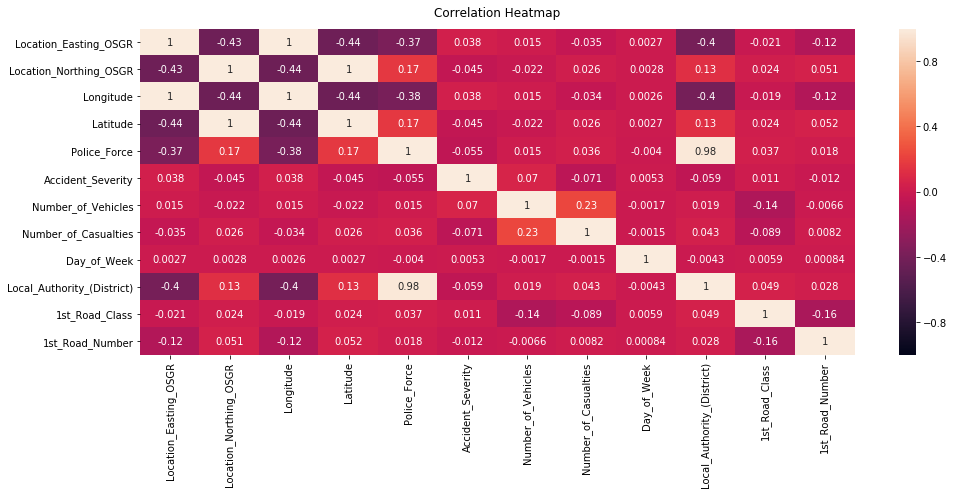

In [63]:
# check the correlation between features 
import seaborn as sns
import matplotlib.pyplot as plt
# sns.heatmap(acc_data.corr())
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(acc_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [64]:
acc_data = acc_data.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [65]:
acc_data['Year'] = acc_data.Date.dt.year 
acc_data['Month_number'] = acc_data.Date.dt.month
acc_data['Month'] = acc_data.Date.dt.month_name()
acc_data['Hour'] = acc_data.apply(lambda x: str(x.Time).split(':')[0], axis=1)

# Save to pickle

In [66]:
acc_data.to_pickle("./accident_data.pkl")
veh_data.to_pickle("./vehicle_data.pkl")
cas_data.to_pickle("./casualties_data.pkl")